### With Feature Selection with uneven dataset

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report 
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDClassifier
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/erinmcmahon26/Company-Bankruptcy-Prediction-Kaggle/main/company_bankruptcy.csv')

In [45]:
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

In [46]:
#create absolute value correlation matrix, since we don't care about direction and it will make the following steps easier
cor_matrix = x.corr().abs()

In [47]:
#pull only the upper triangle since correlation matrices and symmetric
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#identify colinear features at threshold .9
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
xfinal = x.drop(to_drop, axis=1)

In [48]:
xfinal

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.169141,0.311664,0.017560,0.095921,0.022102,0.848195,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.005024,0.390284,0.006479,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.424206,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,1,0.016469
1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.208944,0.318137,0.021144,0.093722,0.022080,0.848088,0.689693,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.005059,0.376760,0.005835,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.468828,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,1,0.020794
2,0.426071,0.601450,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.180581,0.307102,0.005944,0.092338,0.022760,0.848094,0.689463,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.005100,0.379093,0.006562,0.406580,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.013387,0.028997,0.381968,0.141016,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.336731,0.277456,0.0

In [49]:
scaler = StandardScaler()
xfinal = scaler.fit_transform(xfinal.astype(np.float64))

In [50]:
x_train, x_test, y_train, y_test = train_test_split(xfinal,y, test_size=0.2, random_state=42)

accuracy score =  0.9626099706744868
Classification Report               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


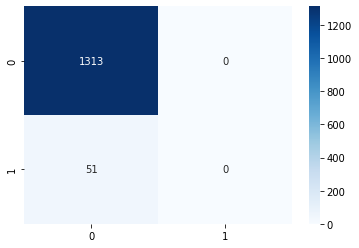

In [51]:
svc = SVC()
svc.fit(x_train, y_train)

sy_pred = svc.predict(x_test)
cm = confusion_matrix(y_test, sy_pred)

sva = accuracy_score(y_test, sy_pred)
print('accuracy score = ',accuracy_score(y_test, sy_pred))
print("Classification Report",classification_report(y_test, sy_pred))

sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

Logistic Regression accuracy is : 0.9655425219941349
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.61      0.22      0.32        51

    accuracy                           0.97      1364
   macro avg       0.79      0.61      0.65      1364
weighted avg       0.96      0.97      0.96      1364



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


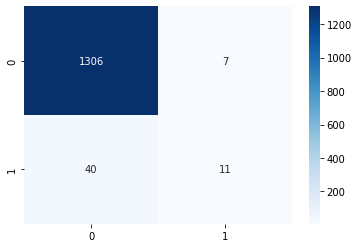

In [52]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
ly_pred= lr_model.predict(x_test)
report = classification_report(y_test,ly_pred)
print("-"*100)
print(report)
cm = confusion_matrix(y_test,lr_model.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

accuracy score =  0.1187683284457478
Report:               precision    recall  f1-score   support

           0       0.97      0.09      0.16      1313
           1       0.04      0.92      0.07        51

    accuracy                           0.12      1364
   macro avg       0.50      0.50      0.12      1364
weighted avg       0.93      0.12      0.16      1364



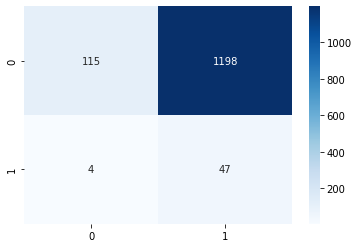

In [53]:
nb = GaussianNB()
nb.fit(x_train,y_train)

ny_pred = nb.predict(x_test)
cm = confusion_matrix(y_test,ny_pred)

nba = accuracy_score(y_test, ny_pred)
print('accuracy score = ', accuracy_score(y_test, ny_pred))
print("Report:", classification_report(y_test, ny_pred))

sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

### Feature Selection with Even Dataset

In [54]:
bankrupt_sample = df[df['Bankrupt?'] == 0][0:220]
non_bankrupt_sample = df[df['Bankrupt?'] == 1]
new_df = pd.concat([bankrupt_sample,non_bankrupt_sample],axis = 0)
new_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,0.781180,3.984834e-04,7.300000e+08,0.461020,0.000805,0.000000,0.158822,0.158822,0.158822,0.161482,0.316687,0.030915,0.099910,0.128945,0.022112,0.848322,0.688590,0.688590,0.217604,5.720000e+09,0.000352,0.263032,0.375303,0.004672,0.002869,0.629988,0.024441,0.216102,0.783898,0.005005,...,0.295221,0.022989,0.003974,0.001050,0.115920,0.340081,0.276643,0.002159,0.508089,0.728731,0.337392,0.009347,0.911441,0.002121,0.092802,1.058011e-04,9.560000e+09,0.593893,2.390000e+09,0.671562,0.355854,0.508089,0.337392,0.120561,0.630419,0.457785,0.560653,0.310296,0.060765,0,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,0.781621,9.000000e+09,5.090000e+07,0.467024,0.000630,0.157607,0.176984,0.176984,0.176984,0.225206,0.324114,0.042561,0.104796,0.180462,0.022114,0.848082,0.689535,0.689535,0.217633,6.630000e+09,0.000451,0.264112,0.384235,0.009657,0.007305,0.631379,0.005278,0.108202,0.891798,0.005640,...,0.447942,0.014616,0.007565,0.000888,0.087042,0.353511,0.277275,0.005756,0.755770,0.734946,0.329804,0.005346,0.935449,0.002360,0.025482,7.290000e+09,6.180000e+09,0.593937,7.340000e+08,0.671572,0.218473,0.755770,0.329804,0.114508,0.641553,0.458954,0.610091,0.314364,0.030201,0,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,0.781598,1.687136e-04,0.000000e+00,0.463142,0.000737,0.005871,0.184189,0.184189,0.184189,0.218398,0.318773,0.026604,0.095188,0.173157,0.022128,0.848159,0.689924,0.689924,0.217654,6.890000e+09,0.000453,0.264151,0.377994,0.013499,0.011823,0.630915,0.002266,0.

In [55]:
y_new = new_df['Bankrupt?']
x_new = new_df.drop('Bankrupt?', axis=1)

In [56]:
cor_matrix_new = x_new.corr().abs()

In [66]:
#pull only the upper triangle since correlation matrices and symmetric
upper_tri = cor_matrix_new.where(np.triu(np.ones(cor_matrix_new.shape),k=1).astype(np.bool))
#identify colinear features at threshold .9
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
xfinal_new = x_new.drop(to_drop, axis=1)

In [67]:
xfinal_new = scaler.fit_transform(xfinal_new.astype(np.float64))

In [69]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(xfinal_new,y_new, test_size=0.2, random_state=42)

accuracy score =  0.8863636363636364
Classification Report               precision    recall  f1-score   support

           0       0.96      0.84      0.90        51
           1       0.81      0.95      0.88        37

    accuracy                           0.89        88
   macro avg       0.88      0.89      0.89        88
weighted avg       0.90      0.89      0.89        88



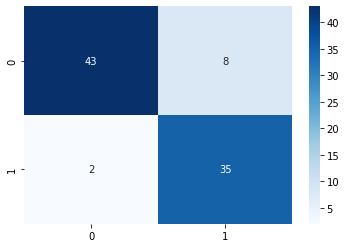

In [70]:
svc = SVC()
svc.fit(x_train_new, y_train_new)

sy_pred_new = svc.predict(x_test_new)
cm = confusion_matrix(y_test_new, sy_pred_new)

sva = accuracy_score(y_test_new, sy_pred_new)
print('accuracy score = ',accuracy_score(y_test_new, sy_pred_new))
print("Classification Report",classification_report(y_test_new, sy_pred_new))

sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

Logistic Regression accuracy is : 0.8522727272727273
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        51
           1       0.80      0.86      0.83        37

    accuracy                           0.85        88
   macro avg       0.85      0.85      0.85        88
weighted avg       0.86      0.85      0.85        88



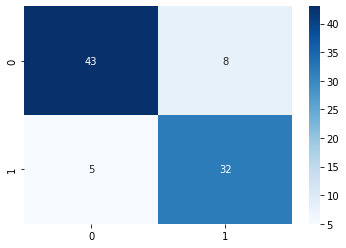

In [71]:
lr_model = LogisticRegression()
lr_model.fit(x_train_new,y_train_new)
accuracy_lr = lr_model.score(x_test_new,y_test_new)
print("Logistic Regression accuracy is :",accuracy_lr)
ly_pred_new= lr_model.predict(x_test_new)
report = classification_report(y_test_new,ly_pred_new)
print("-"*100)
print(report)
cm = confusion_matrix(y_test_new,lr_model.predict(x_test_new))
sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

accuracy score =  0.7159090909090909
Report:               precision    recall  f1-score   support

           0       0.68      0.98      0.80        51
           1       0.93      0.35      0.51        37

    accuracy                           0.72        88
   macro avg       0.80      0.67      0.65        88
weighted avg       0.78      0.72      0.68        88



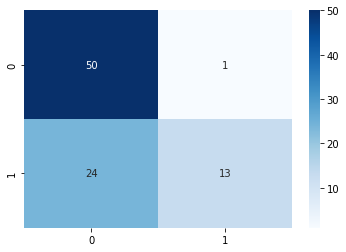

In [72]:
nb = GaussianNB()
nb.fit(x_train_new,y_train_new)

ny_pred_new = nb.predict(x_test_new)
cm = confusion_matrix(y_test_new,ny_pred_new)

nba = accuracy_score(y_test_new, ny_pred_new)
print('accuracy score = ', accuracy_score(y_test_new, ny_pred_new))
print("Report:", classification_report(y_test_new, ny_pred_new))

sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")

Looks like feature selection did not change the models much after evening out the data. It almost does not feel necessary with this dataset...